In [1]:
## importing necessary libraries

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import copy
import os
from google.colab import files

In [2]:
uploaded = files.upload()

Saving ola_driver_scaler.csv to ola_driver_scaler.csv


In [3]:
df=pd.read_csv('ola_driver_scaler.csv')

#### Problem Statement -
#### To develop a predictive model that identifies drivers at risk of churning by analyzing multiple attributes, with the goal of maintaining a stable driver base and ensuring business continuity.

In [4]:
df = pd.read_csv('ola_driver_scaler.csv')

In [5]:
# Getting the shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

Shape of the dataset: (19104, 14)


In [6]:
# Geting the data types and non-null counts
print("\nData Types and Non-Null Counts:")
print(df.info())


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
me

In [7]:
df.drop(["Unnamed: 0"],axis = 1 , inplace=True)

In [8]:
print('Number of Unique Drivers:', df['Driver_ID'].nunique())

Number of Unique Drivers: 2381


#### Converting the datatype of DateTime columns

In [9]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['JoinYear'] = df['Dateofjoining'].dt.year
df['JoinMonth'] = df['Dateofjoining'].dt.month

In [10]:
df.drop(["Dateofjoining"],axis = 1 , inplace=True)

In [11]:
df["Age"] = np.round(df["Age"])
df['Gender'] = np.round(df['Gender'])



In [12]:
df[df['Driver_ID']==1]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,JoinYear,JoinMonth
0,01/01/19,1,28.0,0.0,C23,2,57387,NaN,1,1,2381060,2,2018,12
1,02/01/19,1,28.0,0.0,C23,2,57387,NaN,1,1,-665480,2,2018,12
2,03/01/19,1,28.0,0.0,C23,2,57387,03/11/19,1,1,0,2,2018,12


Aggregating the data based on Driver_ID for better structure, understanding and insights.

In [13]:
# Aggregating metrics
df_test = df.groupby('Driver_ID').agg({
    'MMM-YY': len,
    'Age': 'first',                         # Age of Driver
    'Gender': 'first',
    'Education_Level': max,
    'City': 'first',                        # First city of the driver (if you want to keep categorical data)
    'JoinMonth': 'first',
    'JoinYear': 'first',
    'Joining Designation': 'last',
    'Quarterly Rating': 'mean',             # Average rating per driver
    'Grade': max,
    'Income': ['mean', 'sum'],              # Average and total income per driver
    'Total Business Value': 'sum',          # Total business value per driver
    'LastWorkingDate':'last',

}).reset_index()

# Renaming columns for clarity (optional)
df_test.columns = ['Driver_ID','noOfRecords', 'Age','Gender','Education_Level','City','JoinMonth','JoinYear','JoiningDesignation','Avg_Quarterly_Rating', 'Grade','Avg_Income', 'Total_Income', 'Total_Business_Value','LastWorkingDate']

df_test

,Driver_ID,noOfRecords,Age,Gender,Education_Level,City,JoinMonth,JoinYear,JoiningDesignation,Avg_Quarterly_Rating,Grade,Avg_Income,Total_Income,Total_Business_Value,LastWorkingDate
0,1,3,28.0,0.0,2,C23,12,2018,1,2.000000,1,57387.0,172161,1715580,03/11/19
1,2,2,31.0,0.0,2,C7,11,2020,2,1.000000,2,67016.0,134032,0,None
2,4,5,43.0,0.0,2,C13,12,2019,2,1.000000,2,65603.0,328015,350000,27/04/20
3,5,3,29.0,0.0,0,C9,1,2019,1,1.000000,1,46368.0,139104,120360,03/07/19
4,6,5,31.0,1.0,1,C11,7,2020,3,1.600000,3,78728.0,393640,1265000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,24,33.0,0.0,0,C24,10,2015,2,2.625000,3,82815.0,1987560,21748820,None
2377,2785,3,34.0,1.0,0,C9,8,2020,1,1.000000,1,12105.0,36315,0,28/10/20
2378,2786,9,44.0,0.0,0,C19,7,2018,2,1.666667,2,35370.0,318330,2815090,22/09/19
2379,2787,6,28.0,1.0,2,C20,7,2018,1,1.500000,1,69498.0,416988,977830,20/06/19


### Creating Target Variable
#### Logic -
1. If the last working date is present then the driver is no longer with OLA, we will label this as ___0___
2. If the last working date is NAN then the driver is still with OLA, we will label this as __1__


In [14]:
pd.Series(np.where(df_test["LastWorkingDate"].isna(),0,1)).value_counts()

,count
1,1616
0,765


In [15]:
df_test["Churn"] = df_test["LastWorkingDate"].fillna(0)

In [16]:
def churn_logic(x):
    if x == 0:
        return 0
    if x != 0:
        return 1

In [17]:
df_test["Churn"] = df_test["Churn"].apply(churn_logic)


In [18]:
df_test['Churn'].value_counts().to_frame

<bound method Series.to_frame of Churn
1    1616
0     765
Name: count, dtype: int64>

In [19]:
df_test['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
1,67.870643
0,32.129357


#### Detecting Null Values in features other than Last Working Date - Which is our target variable, so naturally the class label __0__ is considered as __NULL__

In [20]:
(df_test.isna().sum()/len(df_test))

,0
Driver_ID,0.000000
noOfRecords,0.000000
Age,0.000000
Gender,0.000000
Education_Level,0.000000
City,0.000000
JoinMonth,0.000000
JoinYear,0.000000
JoiningDesignation,0.000000
Avg_Quarterly_Rating,0.000000


#### Univariate Analysis

##### CountPlots and BoxPlots of Numerical Variables

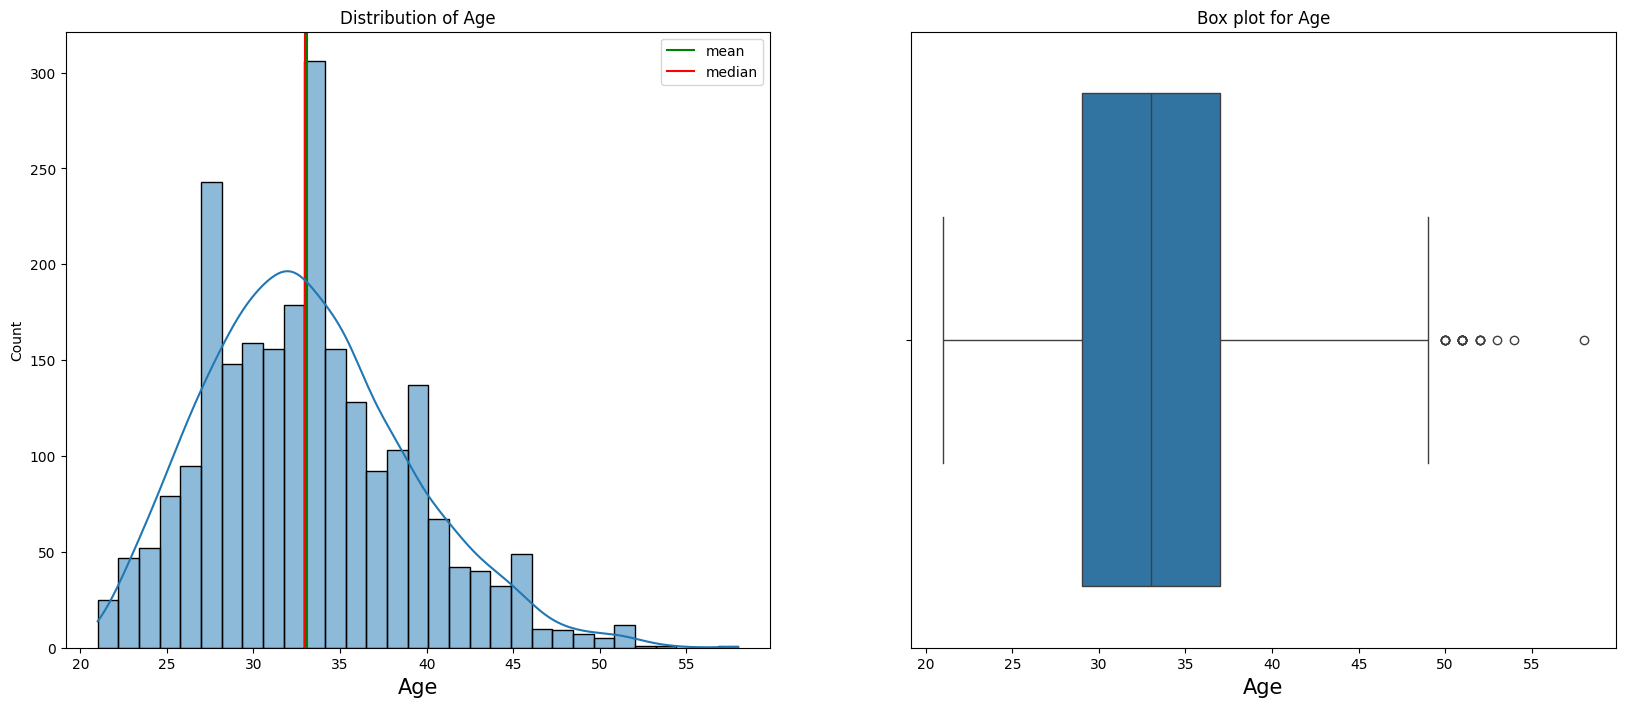

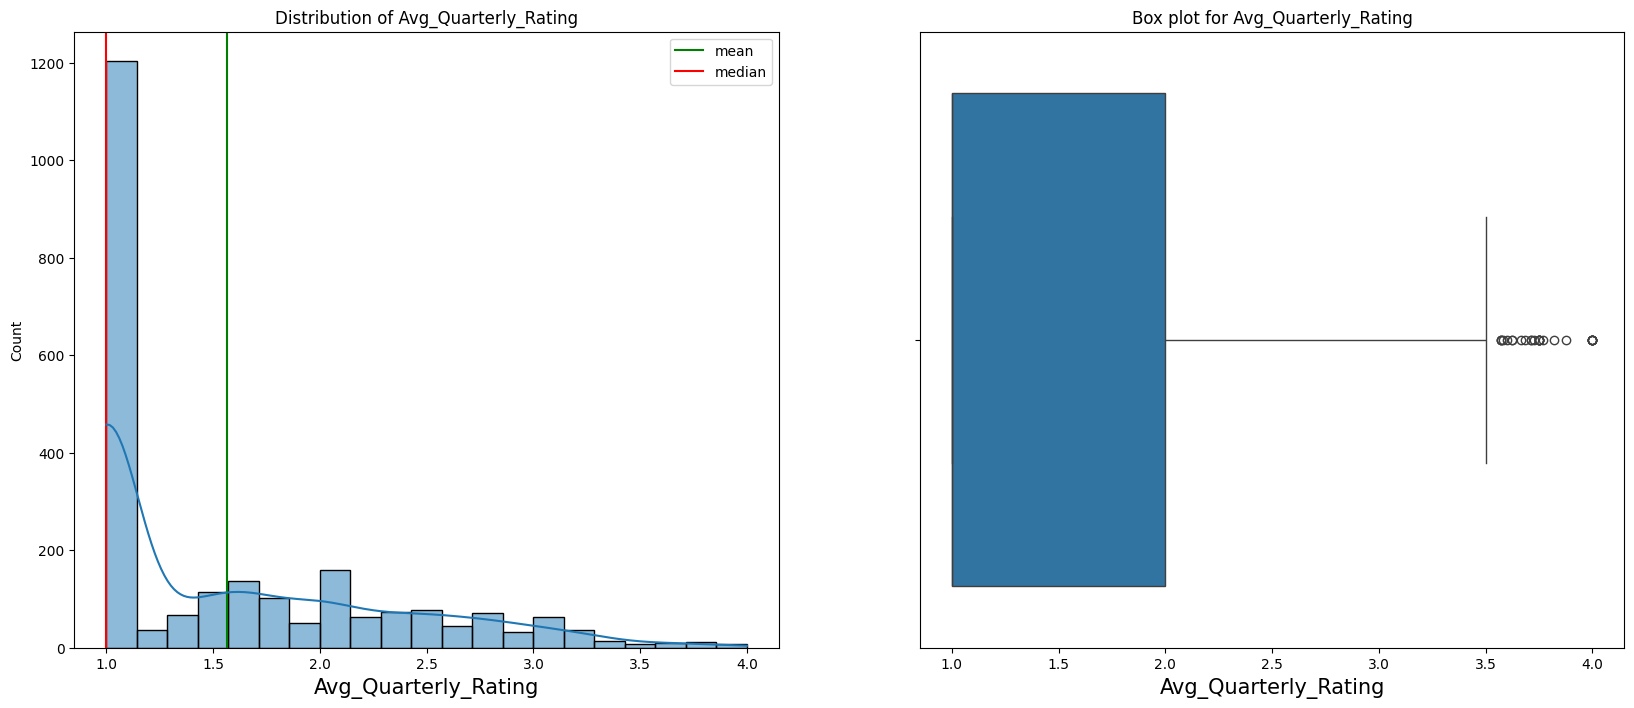

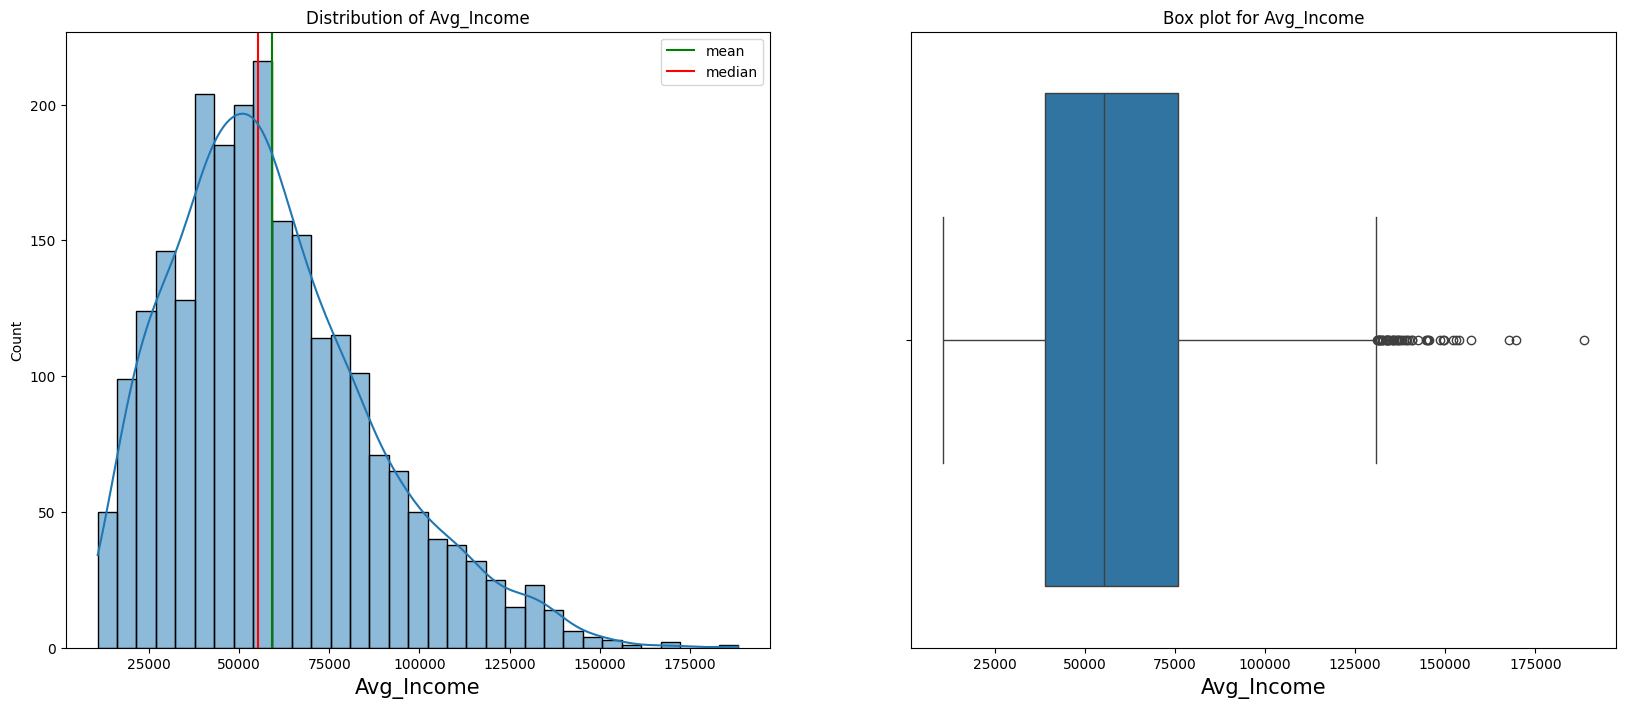

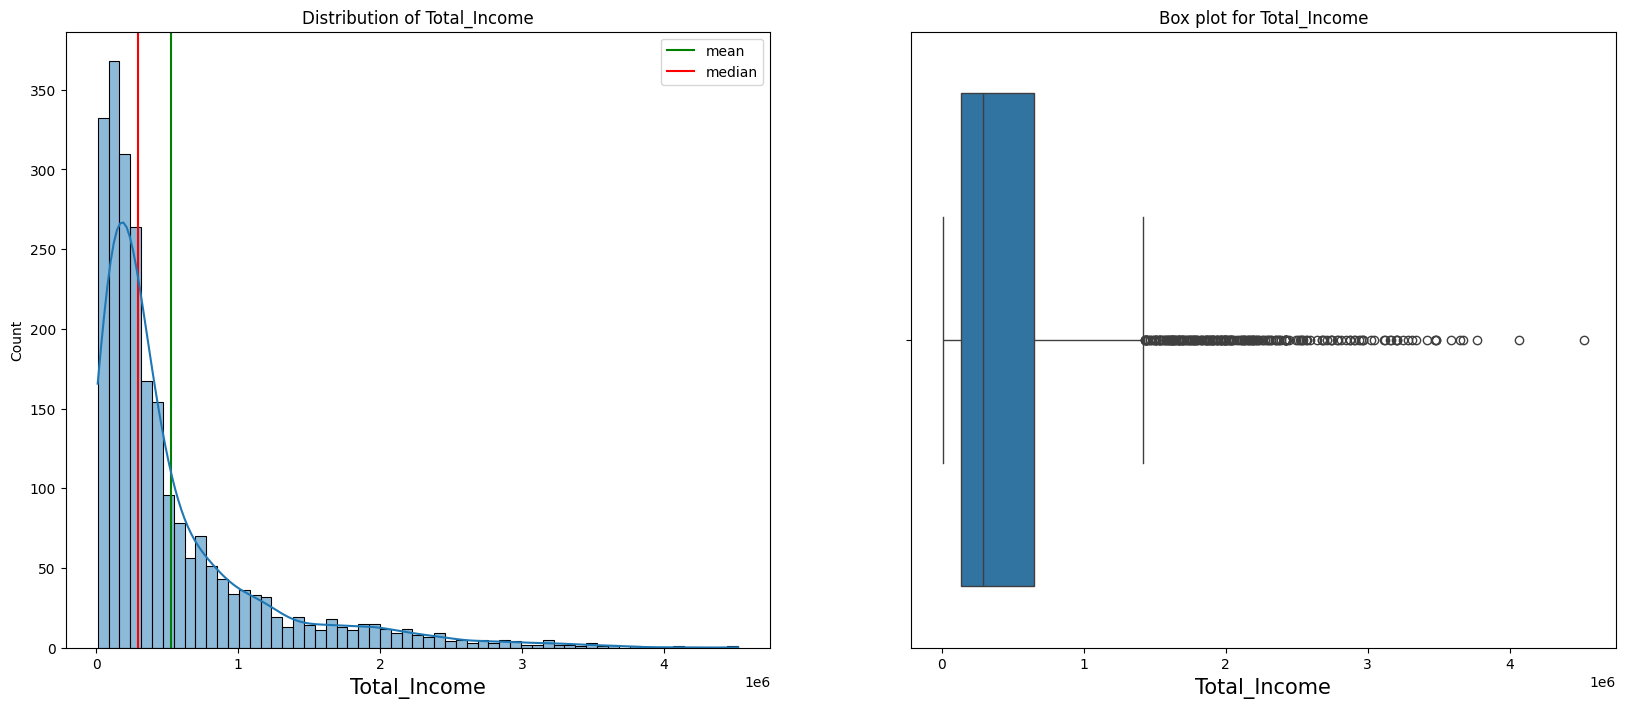

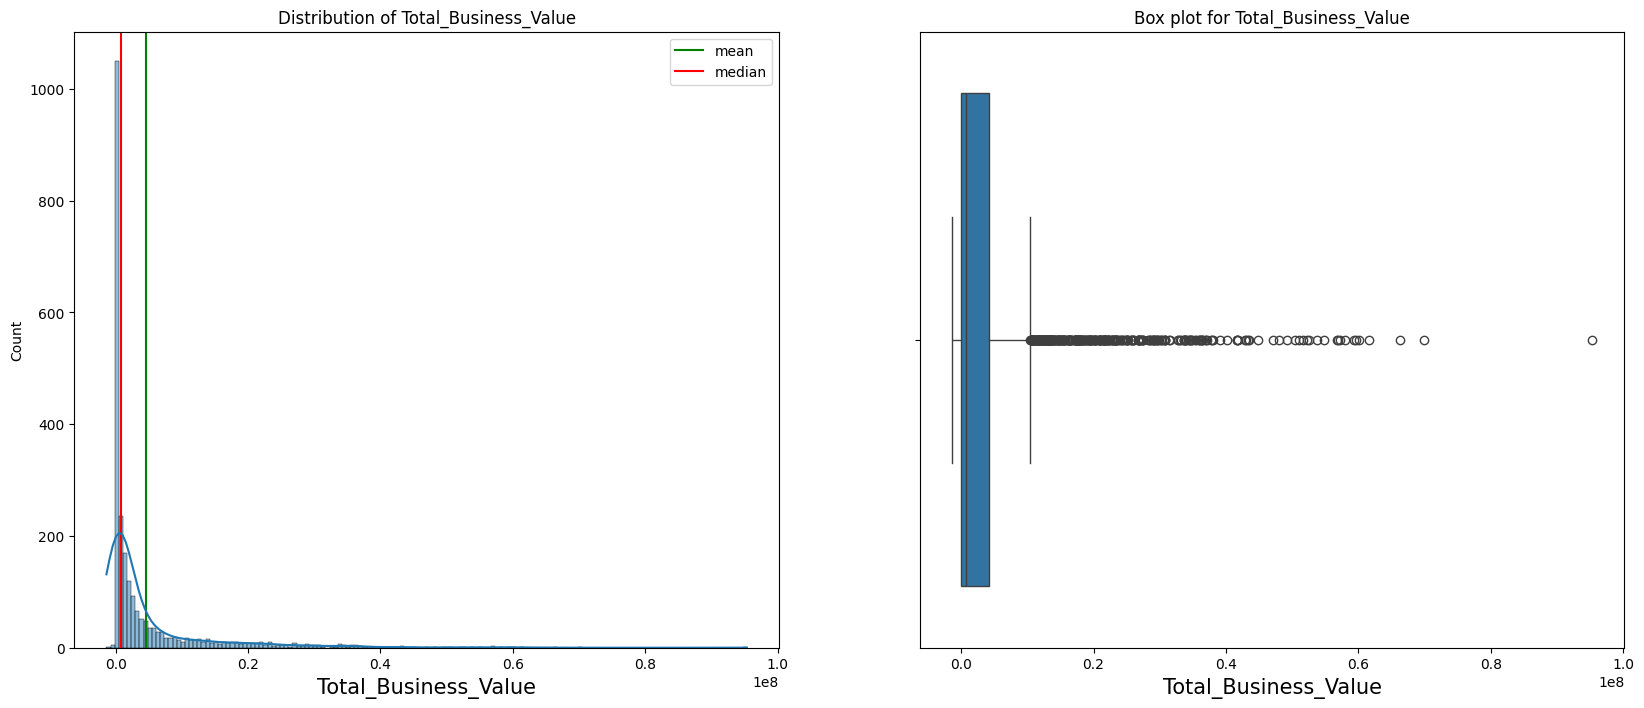

In [21]:
n_variables = ["Age","Avg_Quarterly_Rating","Avg_Income","Total_Income","Total_Business_Value"]
for i in range(len(n_variables)):
    fig = plt.figure(figsize = (20, 8))

    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.set_title(f"Distribution of {n_variables[i]}")
    ax1.set_xlabel(ax1.get_xlabel(), fontsize = 15)
    ax1.axvline(df_test[n_variables[i]].mean(),color="green", label = "mean")
    ax1.axvline(df_test[n_variables[i]].median(),color="red", label = "median")
    ax1.legend(loc = "best")
    sns.histplot(data=df_test, x=n_variables[i], ax=ax1, kde=True)

    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.set_title(f"Box plot for {n_variables[i]}")
    ax2.set_xlabel(ax1.get_xlabel(), fontsize = 15)
    sns.boxplot(data = df_test, x=n_variables[i], ax=ax2)

plt.show()

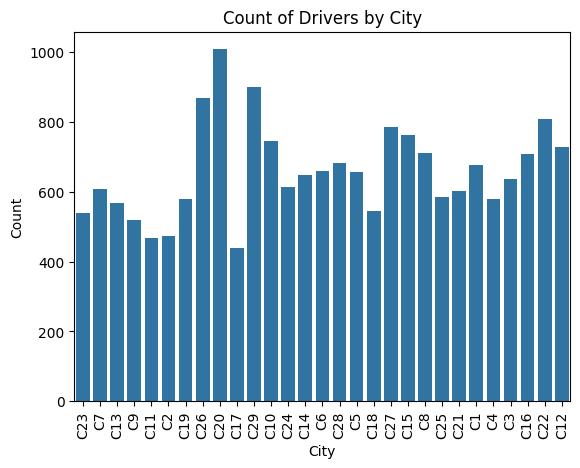

In [22]:
# Plotting Count plot for: 'City'
sns.countplot(x='City', data=df)
plt.title('Count of Drivers by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Bi-Variate Analysis

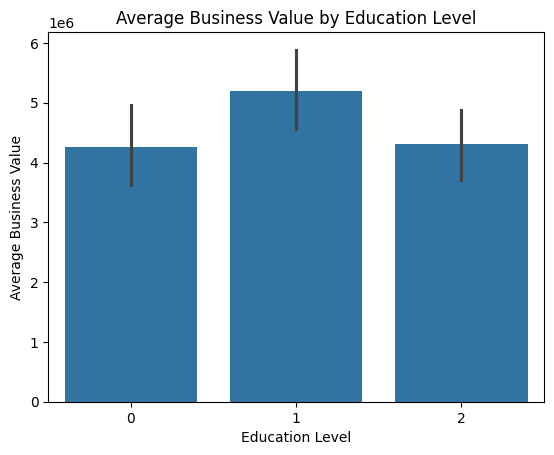

In [ ]:
# Plotting Bar plot for 'Education_Level' vs 'Avg_Business_Value
sns.barplot(x='Education_Level', y='Total_Business_Value', data=df_test)
plt.title('Average Business Value by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Business Value')
plt.show()

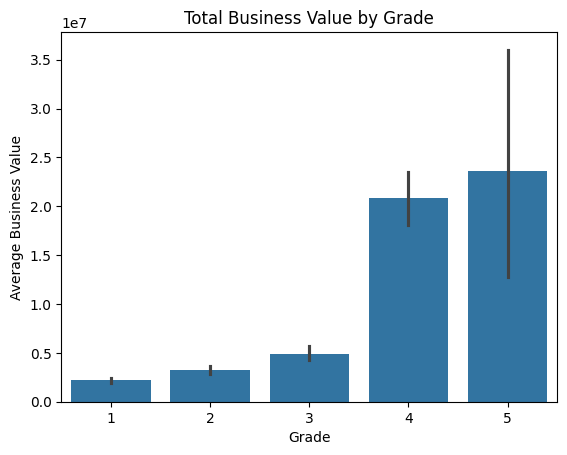

In [29]:
# Plotting Bar plot for 'Grade' vs 'Avg_Business_Value'
sns.barplot(x='Grade', y='Total_Business_Value', data=df_test)
plt.title('Total Business Value by Grade')
plt.xlabel('Grade')
plt.ylabel('Total Business Value')
plt.show()

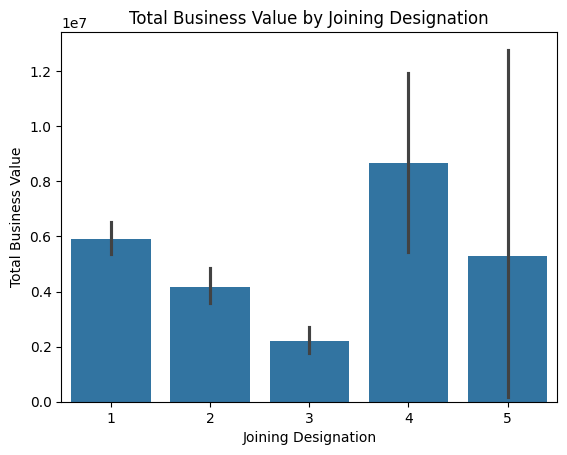

In [32]:
# Plotting Bar plot for 'Joining Designation' vs 'Total_Business_Value'
sns.barplot(x='JoiningDesignation', y='Total_Business_Value', data=df_test)
plt.title('Total Business Value by Joining Designation')
plt.xlabel('Joining Designation')
plt.ylabel('Total Business Value')
plt.show()

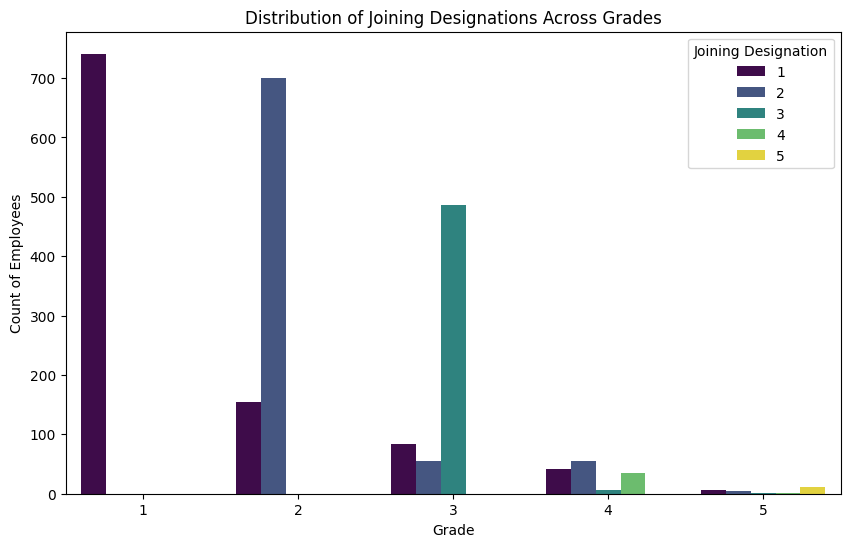

In [40]:
# Plotting for 'Grade' vs 'Joining Designation'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='Grade', hue='JoiningDesignation', palette='viridis')

plt.title('Distribution of Joining Designations Across Grades')
plt.xlabel('Grade')
plt.ylabel('Count of Employees')
plt.legend(title='Joining Designation')
plt.show()

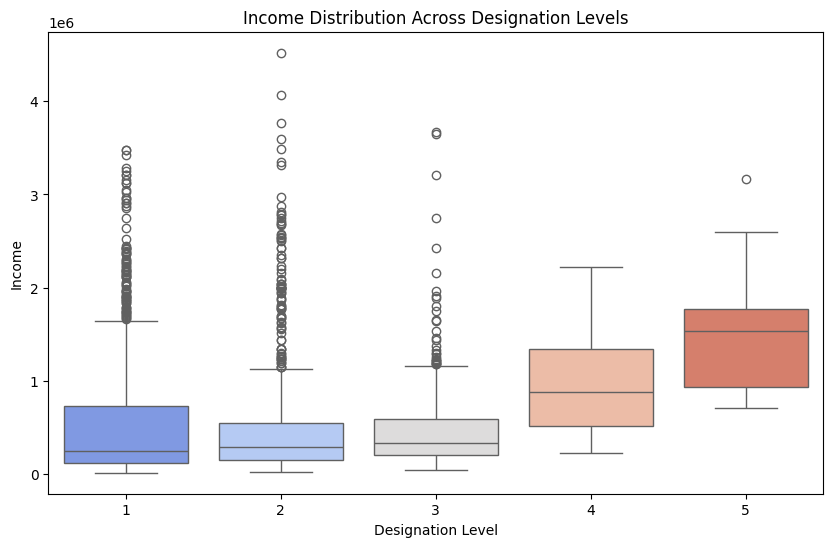

In [41]:
# Plotting for Income vs Joining Designation
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_test, x='JoiningDesignation', y='Total_Income', palette='coolwarm')

plt.title('Income Distribution Across Designation Levels')
plt.xlabel('Designation Level')
plt.ylabel('Income')
plt.show()

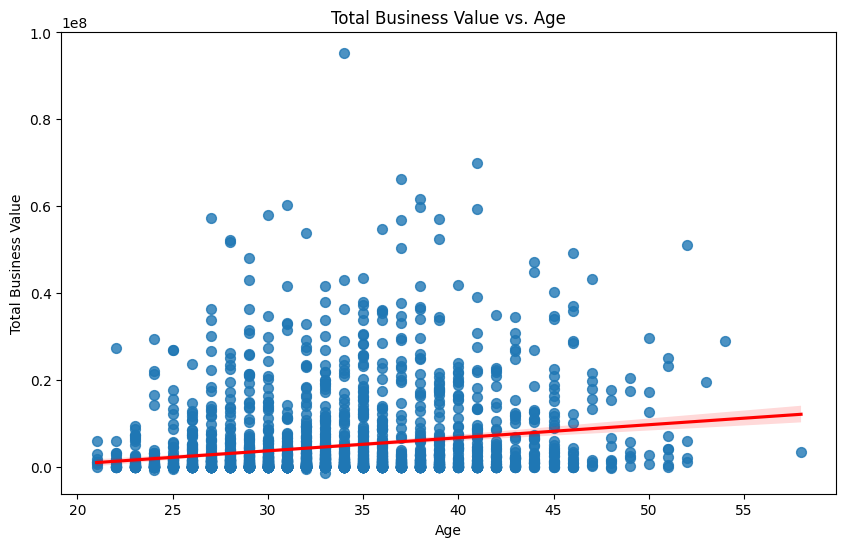

In [43]:
# Plotting for Age vs Total business value
plt.figure(figsize=(10, 6))
sns.regplot(data=df_test, x='Age', y='Total_Business_Value', scatter_kws={'s':50}, line_kws={"color":"red"})

plt.title('Total Business Value vs. Age')
plt.xlabel('Age')
plt.ylabel('Total Business Value')
plt.show()

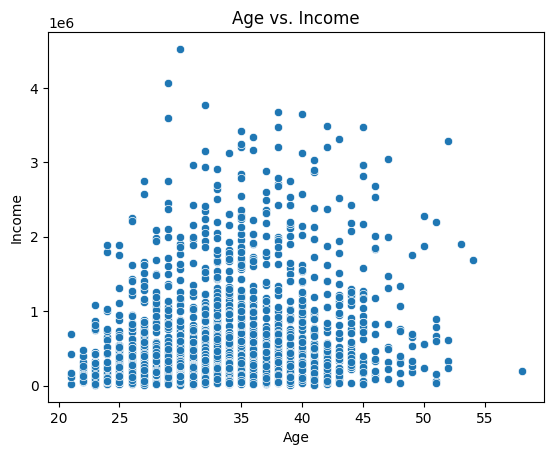

In [ ]:
# Plotting Scatter plot between 'Age' and 'Income'
sns.scatterplot(x='Age', y='Total_Income', data=df_test)
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

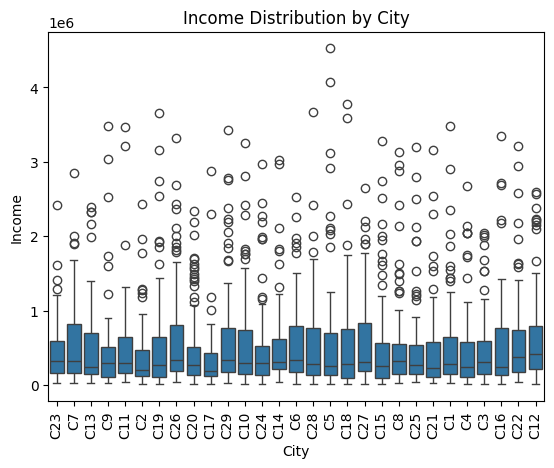

In [ ]:
# Plotting Box plot for 'Income' by 'City'
sns.boxplot(x='City', y='Total_Income', data=df_test)
plt.title('Income Distribution by City')
plt.xlabel('City')
plt.ylabel('Income')
plt.xticks(rotation=90)
plt.show()

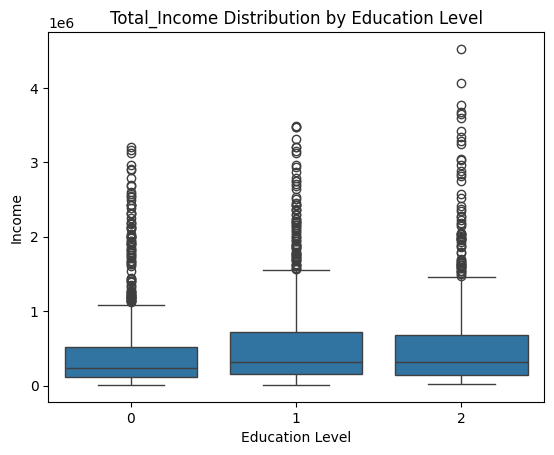

In [ ]:
# Plotting Scatter plot between 'Education_Level' and 'Income'
sns.boxplot(x='Education_Level', y='Total_Income', data=df_test)
plt.title('Total_Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

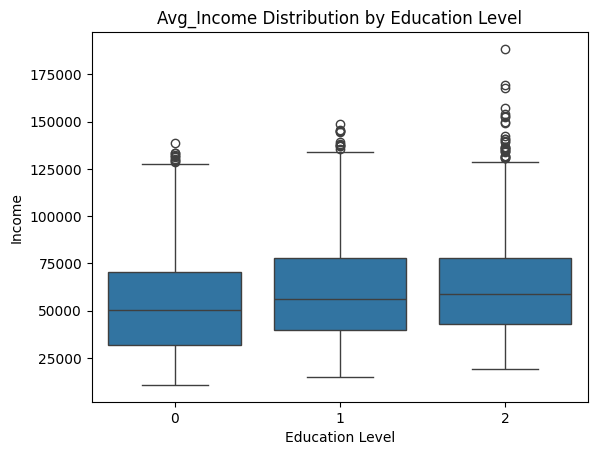

In [ ]:
# Plotting Scatter plot between 'Education_Level' and 'Income'
sns.boxplot(x='Education_Level', y='Avg_Income', data=df_test)
plt.title('Avg_Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

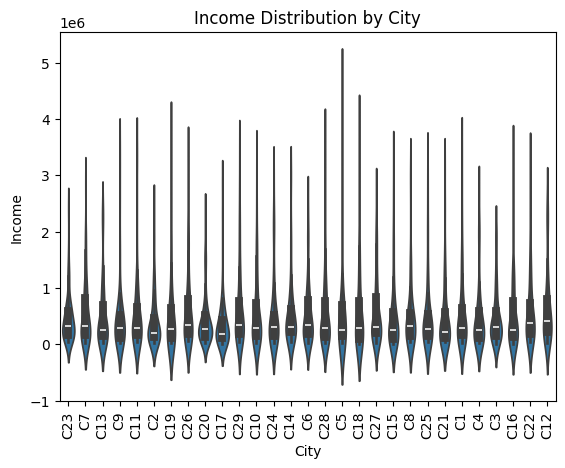

In [ ]:
# Plotting Violin plot for 'Income' by 'City'
sns.violinplot(x='City', y='Total_Income', data=df_test)
plt.title('Income Distribution by City')
plt.xlabel('City')
plt.ylabel('Income')
plt.xticks(rotation=90)
plt.show()

In [44]:
# Plotting Crosstab between 'City' and 'Education_Level'
crosstab = pd.crosstab(df_test['City'], df_test['Education_Level'])
crosstab

Education_Level,0,1,2
City,,,
C1,26,27,27
C10,32,26,28
C11,13,25,26
C12,27,27,27
C13,24,21,26
C14,24,30,25
C15,33,33,35
C16,31,29,24
C17,24,22,25


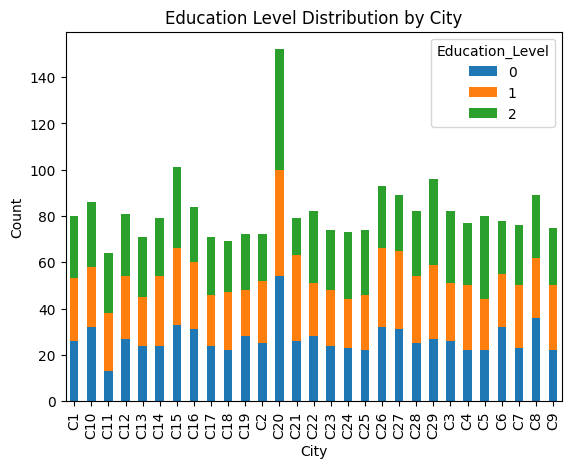

In [45]:
# Plotting stacked bar plot of 'Education_Level' by 'City'
pd.crosstab(df_test['City'], df_test['Education_Level']).plot(kind='bar', stacked=True)
plt.title('Education Level Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [46]:
import plotly.express as px
import plotly.graph_objects as go
numeric_df = df_test.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Creating a heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='tropic',
    colorbar=dict(title="Correlation"),
    zmin=-1, zmax=1,
    hovertemplate='%{y} vs %{x}: %{z:.4f}<extra></extra>',
    text=correlation_matrix.values))

# Updating layout for better readability
fig.update_layout(
    title='Correlation Matrix Heatmap',
    xaxis_nticks=36,
    yaxis_nticks=36,
    height=600,
    width=1000,
    margin=dict(l=50, r=50, t=50, b=50),
    xaxis=dict(tickangle=45),
    yaxis=dict(tickangle=0)
)

# Show the heatmap
fig.show()

#### Analysis wrt Target Variable

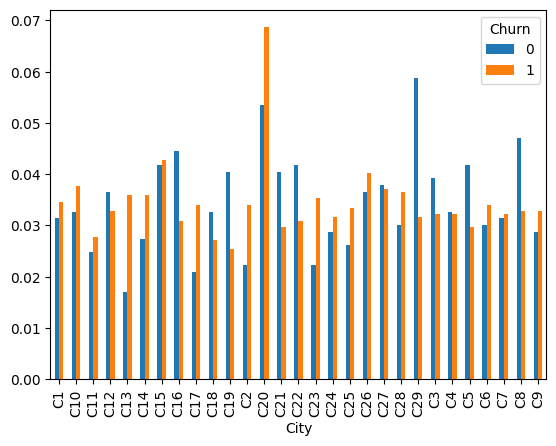

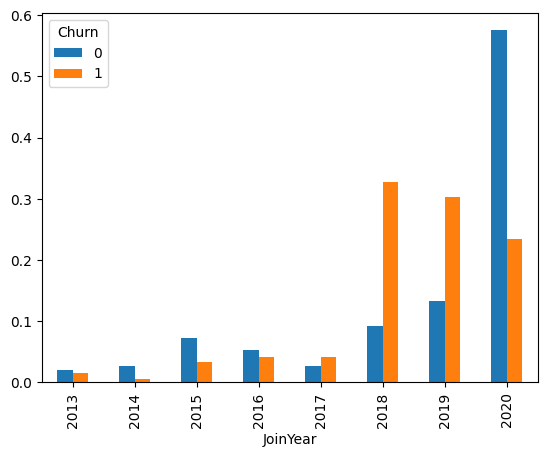

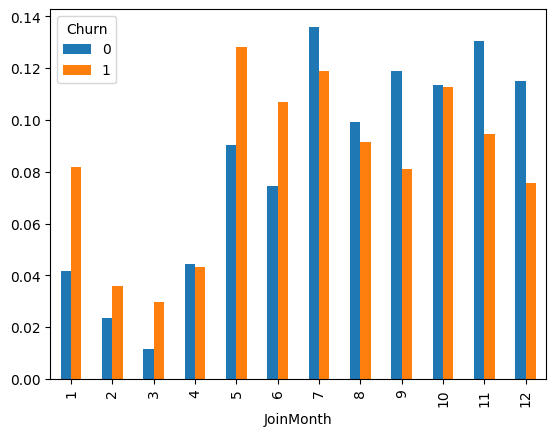

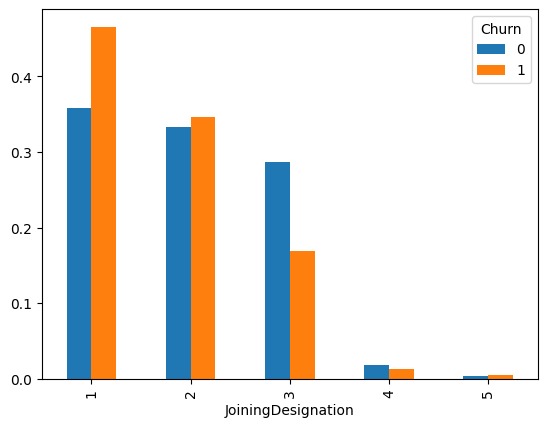

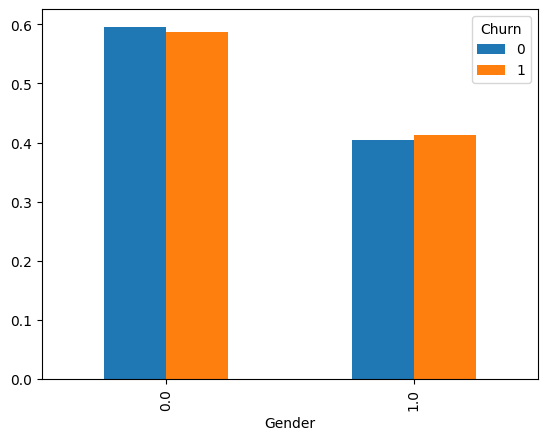

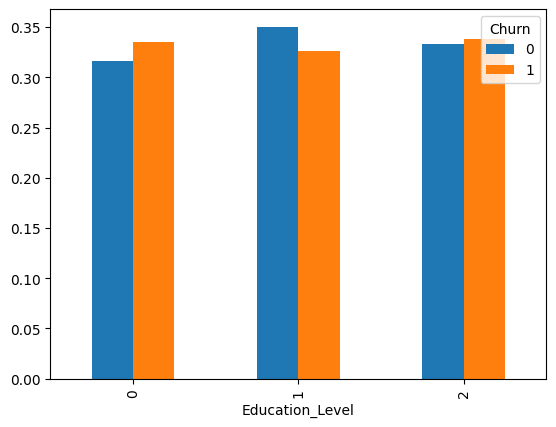

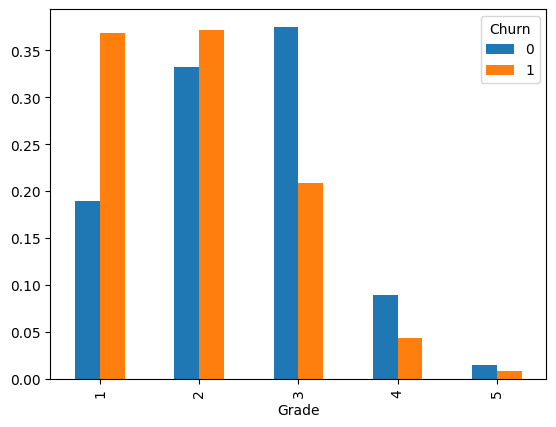

In [51]:
# Separating numeric and categorical columns
c_variables = ['City', 'JoinYear', 'JoinMonth' , 'JoiningDesignation', 'Gender', 'Education_Level', 'Grade']
for col in c_variables:
    pd.crosstab(index = df_test[col],
               columns = df_test["Churn"],
               normalize="columns").plot(kind = "bar")
    plt.show()

### Feature Creation and Engineering


For employee churn it is important to know their performance and income
1. Quarterly Rating - checking whether the quaterly rate is increased or not. Label 1 if it has increased, otherwise Label 0.
2. Monthly Income - checking whether the monthly income is increased or not. Label 1 if it has increased, otherwise Label 0.

In [52]:
df.groupby("Driver_ID")["Quarterly Rating"].unique()

,Quarterly Rating
Driver_ID,
1,[2]
2,[1]
4,[1]
5,[1]
6,"[1, 2]"
...,...
2784,"[3, 1, 4]"
2785,[1]
2786,"[2, 1]"


In [53]:
def check_rating_increase(ratings):

    if len(ratings)>=2:
        for i in range(len(ratings)):
            if ratings[-1]>ratings[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [54]:
QR_Performance = df.groupby("Driver_ID")["Quarterly Rating"].unique().apply(check_rating_increase)

In [55]:
df_test = pd.merge(left = QR_Performance,
        right = df_test,
         on = "Driver_ID",
         how="outer"
    )

In [56]:
df_test['QR_Performance'] = df_test['Quarterly Rating']

In [57]:
df_test['QR_Performance'].value_counts()


,count
QR_Performance,
0,1836
1,545


In [58]:
df.groupby("Driver_ID")["Income"].unique()

,Income
Driver_ID,
1,[57387]
2,[67016]
4,[65603]
5,[46368]
6,[78728]
...,...
2784,[82815]
2785,[12105]
2786,[35370]


In [59]:
def Income_Raise(incomes):

    if len(incomes)>=2:
        for i in range(len(incomes)):
            if incomes[-1]>incomes[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [60]:
IncomeRaise = df.groupby("Driver_ID")["Income"].unique().apply(Income_Raise)

In [61]:
df_test = pd.merge(left = IncomeRaise.rename("IncomeRaise"),
          right = df_test,
         on = "Driver_ID",
         how="outer"
    )

In [62]:
df_test['IncomeRaise'].value_counts()

,count
IncomeRaise,
0,2337
1,44


In [63]:
df_test

,Driver_ID,IncomeRaise,Quarterly Rating,noOfRecords,Age,Gender,Education_Level,City,JoinMonth,JoinYear,JoiningDesignation,Avg_Quarterly_Rating,Grade,Avg_Income,Total_Income,Total_Business_Value,LastWorkingDate,Churn,QR_Performance
0,1,0,0,3,28.0,0.0,2,C23,12,2018,1,2.000000,1,57387.0,172161,1715580,03/11/19,1,0
1,2,0,0,2,31.0,0.0,2,C7,11,2020,2,1.000000,2,67016.0,134032,0,None,0,0
2,4,0,0,5,43.0,0.0,2,C13,12,2019,2,1.000000,2,65603.0,328015,350000,27/04/20,1,0
3,5,0,0,3,29.0,0.0,0,C9,1,2019,1,1.000000,1,46368.0,139104,120360,03/07/19,1,0
4,6,0,1,5,31.0,1.0,1,C11,7,2020,3,1.600000,3,78728.0,393640,1265000,None,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,1,24,33.0,0.0,0,C24,10,2015,2,2.625000,3,82815.0,1987560,21748820,None,0,1
2377,2785,0,0,3,34.0,1.0,0,C9,8,2020,1,1.000000,1,12105.0,36315,0,28/10/20,1,0
2378,2786,0,0,9,44.0,0.0,0,C19,7,2018,2,1.666667,2,35370.0,318330,2815090,22/09/19,1,0
2379,2787,0,0,6,28.0,1.0,2,C20,7,2018,1,1.500000,1,69498.0,416988,977830,20/06/19,1,0


In [64]:
df_test['Age'] = df_test['Age'].astype(int)
df_test['Gender'] = df_test['Gender'].astype(int)
df_test['Avg_Quarterly_Rating'] = df_test['Avg_Quarterly_Rating'].round(1)

In [65]:
df_test

,Driver_ID,IncomeRaise,Quarterly Rating,noOfRecords,Age,Gender,Education_Level,City,JoinMonth,JoinYear,JoiningDesignation,Avg_Quarterly_Rating,Grade,Avg_Income,Total_Income,Total_Business_Value,LastWorkingDate,Churn,QR_Performance
0,1,0,0,3,28,0,2,C23,12,2018,1,2.0,1,57387.0,172161,1715580,03/11/19,1,0
1,2,0,0,2,31,0,2,C7,11,2020,2,1.0,2,67016.0,134032,0,None,0,0
2,4,0,0,5,43,0,2,C13,12,2019,2,1.0,2,65603.0,328015,350000,27/04/20,1,0
3,5,0,0,3,29,0,0,C9,1,2019,1,1.0,1,46368.0,139104,120360,03/07/19,1,0
4,6,0,1,5,31,1,1,C11,7,2020,3,1.6,3,78728.0,393640,1265000,None,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,1,24,33,0,0,C24,10,2015,2,2.6,3,82815.0,1987560,21748820,None,0,1
2377,2785,0,0,3,34,1,0,C9,8,2020,1,1.0,1,12105.0,36315,0,28/10/20,1,0
2378,2786,0,0,9,44,0,0,C19,7,2018,2,1.7,2,35370.0,318330,2815090,22/09/19,1,0
2379,2787,0,0,6,28,1,2,C20,7,2018,1,1.5,1,69498.0,416988,977830,20/06/19,1,0


In [66]:
# we can drop the Last working date column as we have created a target variable out of it.
df_test.drop(["LastWorkingDate"],axis = 1 , inplace=True)

In [67]:
df_test

,Driver_ID,IncomeRaise,Quarterly Rating,noOfRecords,Age,Gender,Education_Level,City,JoinMonth,JoinYear,JoiningDesignation,Avg_Quarterly_Rating,Grade,Avg_Income,Total_Income,Total_Business_Value,Churn,QR_Performance
0,1,0,0,3,28,0,2,C23,12,2018,1,2.0,1,57387.0,172161,1715580,1,0
1,2,0,0,2,31,0,2,C7,11,2020,2,1.0,2,67016.0,134032,0,0,0
2,4,0,0,5,43,0,2,C13,12,2019,2,1.0,2,65603.0,328015,350000,1,0
3,5,0,0,3,29,0,0,C9,1,2019,1,1.0,1,46368.0,139104,120360,1,0
4,6,0,1,5,31,1,1,C11,7,2020,3,1.6,3,78728.0,393640,1265000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,1,24,33,0,0,C24,10,2015,2,2.6,3,82815.0,1987560,21748820,0,1
2377,2785,0,0,3,34,1,0,C9,8,2020,1,1.0,1,12105.0,36315,0,1,0
2378,2786,0,0,9,44,0,0,C19,7,2018,2,1.7,2,35370.0,318330,2815090,1,0
2379,2787,0,0,6,28,1,2,C20,7,2018,1,1.5,1,69498.0,416988,977830,1,0


#### One final check for missing values

In [68]:
df_test.isna().sum()

,0
Driver_ID,0
IncomeRaise,0
Quarterly Rating,0
noOfRecords,0
Age,0
Gender,0
Education_Level,0
City,0
JoinMonth,0
JoinYear,0


In [69]:
df_test.drop(["Driver_ID"],axis = 1 , inplace=True)


In [70]:
df_test.drop(['noOfRecords'], axis = 1, inplace=True)

#### Performing encoding and transformation(standardisation or normalization) to the dataset

#### Target Encoding for the categorical variables


In [71]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 825.9 kB/s eta 0:00:00


In [72]:
from category_encoders import TargetEncoder
te = TargetEncoder()

In [73]:
# defining the categorical varibales for target encoding
c_variables = ['City', 'Grade', 'JoinYear', 'JoinMonth' , 'JoiningDesignation', 'Education_Level']


In [74]:
df_test

,IncomeRaise,Quarterly Rating,Age,Gender,Education_Level,City,JoinMonth,JoinYear,JoiningDesignation,Avg_Quarterly_Rating,Grade,Avg_Income,Total_Income,Total_Business_Value,Churn,QR_Performance
0,0,0,28,0,2,C23,12,2018,1,2.0,1,57387.0,172161,1715580,1,0
1,0,0,31,0,2,C7,11,2020,2,1.0,2,67016.0,134032,0,0,0
2,0,0,43,0,2,C13,12,2019,2,1.0,2,65603.0,328015,350000,1,0
3,0,0,29,0,0,C9,1,2019,1,1.0,1,46368.0,139104,120360,1,0
4,0,1,31,1,1,C11,7,2020,3,1.6,3,78728.0,393640,1265000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,1,33,0,0,C24,10,2015,2,2.6,3,82815.0,1987560,21748820,0,1
2377,0,0,34,1,0,C9,8,2020,1,1.0,1,12105.0,36315,0,1,0
2378,0,0,44,0,0,C19,7,2018,2,1.7,2,35370.0,318330,2815090,1,0
2379,0,0,28,1,2,C20,7,2018,1,1.5,1,69498.0,416988,977830,1,0


In [75]:
def target_encode_columns(df, target_col, cat_columns):

    # Looping through the categorical columns
    for col in cat_columns:
        # Changing the datatype of columns to category
        df[col] = df[col].astype('category')
        # Applying target encoding for each column
        df[col] = te.fit_transform(df[col], df[target_col])

    return df


In [76]:
target_encode_columns(df_test, target_col='Churn', cat_columns=c_variables)

,IncomeRaise,Quarterly Rating,Age,Gender,Education_Level,City,JoinMonth,JoinYear,JoiningDesignation,Avg_Quarterly_Rating,Grade,Avg_Income,Total_Income,Total_Business_Value,Churn,QR_Performance
0,0,0,28,0,0.682045,0.769859,0.580952,0.883139,0.732943,2.0,0.804318,57387.0,172161,1715580,1,0
1,0,0,31,0,0.682045,0.684190,0.604743,0.462103,0.687117,1.0,0.702576,67016.0,134032,0,0,0
2,0,0,43,0,0.682045,0.816064,0.580952,0.827411,0.687117,1.0,0.702576,65603.0,328015,350000,1,0
3,0,0,29,0,0.691327,0.706553,0.804878,0.827411,0.732943,1.0,0.804318,46368.0,139104,120360,1,0
4,0,1,31,1,0.662893,0.702829,0.648649,0.462103,0.555781,1.6,0.540064,78728.0,393640,1265000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,1,33,0,0.691327,0.698531,0.676580,0.495438,0.687117,2.6,0.540064,82815.0,1987560,21748820,0,1
2377,0,0,34,1,0.691327,0.706553,0.660714,0.462103,0.732943,1.0,0.804318,12105.0,36315,0,1,0
2378,0,0,44,0,0.691327,0.570044,0.648649,0.883139,0.687117,1.7,0.702576,35370.0,318330,2815090,1,0
2379,0,0,28,1,0.682045,0.730263,0.648649,0.883139,0.732943,1.5,0.804318,69498.0,416988,977830,1,0


In [77]:
df_test

,IncomeRaise,Quarterly Rating,Age,Gender,Education_Level,City,JoinMonth,JoinYear,JoiningDesignation,Avg_Quarterly_Rating,Grade,Avg_Income,Total_Income,Total_Business_Value,Churn,QR_Performance
0,0,0,28,0,0.682045,0.769859,0.580952,0.883139,0.732943,2.0,0.804318,57387.0,172161,1715580,1,0
1,0,0,31,0,0.682045,0.684190,0.604743,0.462103,0.687117,1.0,0.702576,67016.0,134032,0,0,0
2,0,0,43,0,0.682045,0.816064,0.580952,0.827411,0.687117,1.0,0.702576,65603.0,328015,350000,1,0
3,0,0,29,0,0.691327,0.706553,0.804878,0.827411,0.732943,1.0,0.804318,46368.0,139104,120360,1,0
4,0,1,31,1,0.662893,0.702829,0.648649,0.462103,0.555781,1.6,0.540064,78728.0,393640,1265000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,1,33,0,0.691327,0.698531,0.676580,0.495438,0.687117,2.6,0.540064,82815.0,1987560,21748820,0,1
2377,0,0,34,1,0.691327,0.706553,0.660714,0.462103,0.732943,1.0,0.804318,12105.0,36315,0,1,0
2378,0,0,44,0,0.691327,0.570044,0.648649,0.883139,0.687117,1.7,0.702576,35370.0,318330,2815090,1,0
2379,0,0,28,1,0.682045,0.730263,0.648649,0.883139,0.732943,1.5,0.804318,69498.0,416988,977830,1,0


#### Splitting the data for train and test

In [78]:
df_cleaned = df_test

In [79]:
df_cleaned

,IncomeRaise,Quarterly Rating,Age,Gender,Education_Level,City,JoinMonth,JoinYear,JoiningDesignation,Avg_Quarterly_Rating,Grade,Avg_Income,Total_Income,Total_Business_Value,Churn,QR_Performance
0,0,0,28,0,0.682045,0.769859,0.580952,0.883139,0.732943,2.0,0.804318,57387.0,172161,1715580,1,0
1,0,0,31,0,0.682045,0.684190,0.604743,0.462103,0.687117,1.0,0.702576,67016.0,134032,0,0,0
2,0,0,43,0,0.682045,0.816064,0.580952,0.827411,0.687117,1.0,0.702576,65603.0,328015,350000,1,0
3,0,0,29,0,0.691327,0.706553,0.804878,0.827411,0.732943,1.0,0.804318,46368.0,139104,120360,1,0
4,0,1,31,1,0.662893,0.702829,0.648649,0.462103,0.555781,1.6,0.540064,78728.0,393640,1265000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,1,33,0,0.691327,0.698531,0.676580,0.495438,0.687117,2.6,0.540064,82815.0,1987560,21748820,0,1
2377,0,0,34,1,0.691327,0.706553,0.660714,0.462103,0.732943,1.0,0.804318,12105.0,36315,0,1,0
2378,0,0,44,0,0.691327,0.570044,0.648649,0.883139,0.687117,1.7,0.702576,35370.0,318330,2815090,1,0
2379,0,0,28,1,0.682045,0.730263,0.648649,0.883139,0.732943,1.5,0.804318,69498.0,416988,977830,1,0


In [80]:
X = df_cleaned.drop(["Churn"],axis = 1)
y = df_cleaned["Churn"]

In [81]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train ,y_test = train_test_split(X,y,
                                                    random_state=5,
                                                    test_size=0.2)

In [82]:
y.value_counts()


,count
Churn,
1,1616
0,765


#### Standardizing the Independent Variables

In [83]:
from sklearn.preprocessing import StandardScaler


In [84]:
scaler = StandardScaler()

In [85]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)


In [86]:
X_test =  scaler.transform(X_test)

#### Model Building
1. Bagging - RandomForestClassifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix



In [88]:
rf = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=10,
    bootstrap=True,
    class_weight='balanced')

In [89]:
rf.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10)

In [90]:
y_pred = rf.predict(X_test)

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       162
           1       0.92      0.92      0.92       315

    accuracy                           0.89       477
   macro avg       0.88      0.88      0.88       477
weighted avg       0.89      0.89      0.89       477



In [92]:
rf.score(X_train,y_train),rf.score(X_test,y_test)


(0.9800420168067226, 0.8909853249475891)

In [93]:
rf.feature_importances_


array([0.0058548 , 0.02719898, 0.04406306, 0.00876644, 0.01443031,
       0.04923664, 0.09094101, 0.21798083, 0.0280354 , 0.1205989 ,
       0.02114244, 0.06502678, 0.13132383, 0.15216316, 0.02323742])

<Axes: >

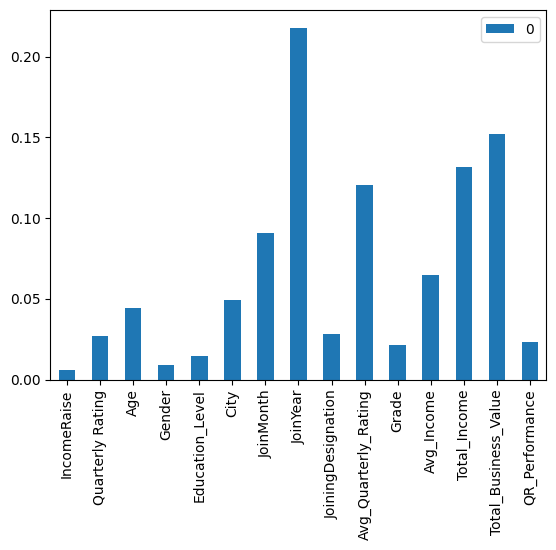

In [94]:
pd.DataFrame(data=rf.feature_importances_,
            index=X.columns).plot(kind="bar")

In [95]:
f1_score(y_test,rf.predict(X_test)),f1_score(y_train,rf.predict(X_train))


(0.9174603174603174, 0.9853508095605243)

### We can improve the model by running a GridSearchCV on RandomForestClassifier in order to get the best hyper-parameters

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve,confusion_matrix

In [97]:
# creating a model evalutor function

def evaluate_model(X_train, y_train, X_test, y_test, model):
    # Train the model
    model.fit(X_train, y_train)

    # Predicting on train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculating training and test scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Generating classification report
    report = classification_report(y_test, y_test_pred)

    # Predict probabilities for ROC AUC and Precision-Recall curve
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Calculating the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Calculating ROC AUC score using sklearn's roc_auc_score
    roc_auc_score_value = roc_auc_score(y_test, y_test_prob)

    # Compute ROC curve and ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    # Computing Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)

    # Plotting ROC curve
    plt.figure(figsize=(20, 8))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

    # Plotting Precision-Recall curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')

    # Plotting Confusion Matrix
    plt.subplot(1, 3, 3)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')



    plt.tight_layout(pad = 3.0)
    plt.show()

    print(f"F1 Score on Test Data: {f1_score(y_test, y_test_pred):.4f}")
    print(f"F1 Score on Train Data: {f1_score(y_train, y_train_pred):.4f}")
    print('-'*50)
    print(f"Precision Score on Test Data: {precision_score(y_test,y_test_pred):.4f}")
    print(f"Precision Score on Train Data: {precision_score(y_train,y_train_pred):.4f}")
    print('-'*50)
    print(f"Recall Score on Test Data: {recall_score(y_test, y_test_pred):.4f}")
    print(f"Recall Score on Train Data: {recall_score(y_train, y_train_pred):.4f}")
    print('-'*50)

    print(f"Training Score: {train_score}")
    print(f"Test Score: {test_score}")
    print('-'*50)
    print(f"Classification Report:\n{report}")
    print('-'*50)
    print(f"Confusion Matrix: {conf_matrix}")
    print('-'*50)
    print(f"ROC AUC Score: {roc_auc_score_value}")



    return train_score, test_score, report, conf_matrix, roc_auc_score_value

#### Searching for best hyper-parameters for ___Random Forest___ using gridsearch CV

In [98]:
params = {"max_depth":[10,15,20,25],
             "n_estimators":[20,40,50,60],
             "max_features":[4,6,10,'sqrt'],
             "ccp_alpha":[0.002,0.005,0.01,0.1]}

In [99]:
rfc = RandomForestClassifier()

In [100]:
grid_search = GridSearchCV(
    estimator = rfc,
    param_grid = params,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,
    cv=4,
    pre_dispatch='2*n_jobs')

In [101]:
grid_search.fit(X_train,y_train.values.ravel())


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.002, 0.005, 0.01, 0.1],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': [4, 6, 10, 'sqrt'],
                         'n_estimators': [20, 40, 50, 60]},
             scoring='accuracy')

In [102]:
print(grid_search.best_estimator_, "\n" ,"-"*50, "\n",
      grid_search.best_score_,"\n","-"*50,"\n",
      grid_search.best_score_)



RandomForestClassifier(ccp_alpha=0.002, max_depth=15, max_features=10,
                       n_estimators=50) 
 -------------------------------------------------- 
 0.8886554621848739 
 -------------------------------------------------- 
 0.8886554621848739


In [123]:
rfc_best_params = RandomForestClassifier(n_estimators=50,
    criterion='entropy',
    max_features=10,
    max_depth=7,
    min_samples_split=20,
    min_samples_leaf=4,
    class_weight="balanced",
    ccp_alpha=0.002,
    max_samples=None)


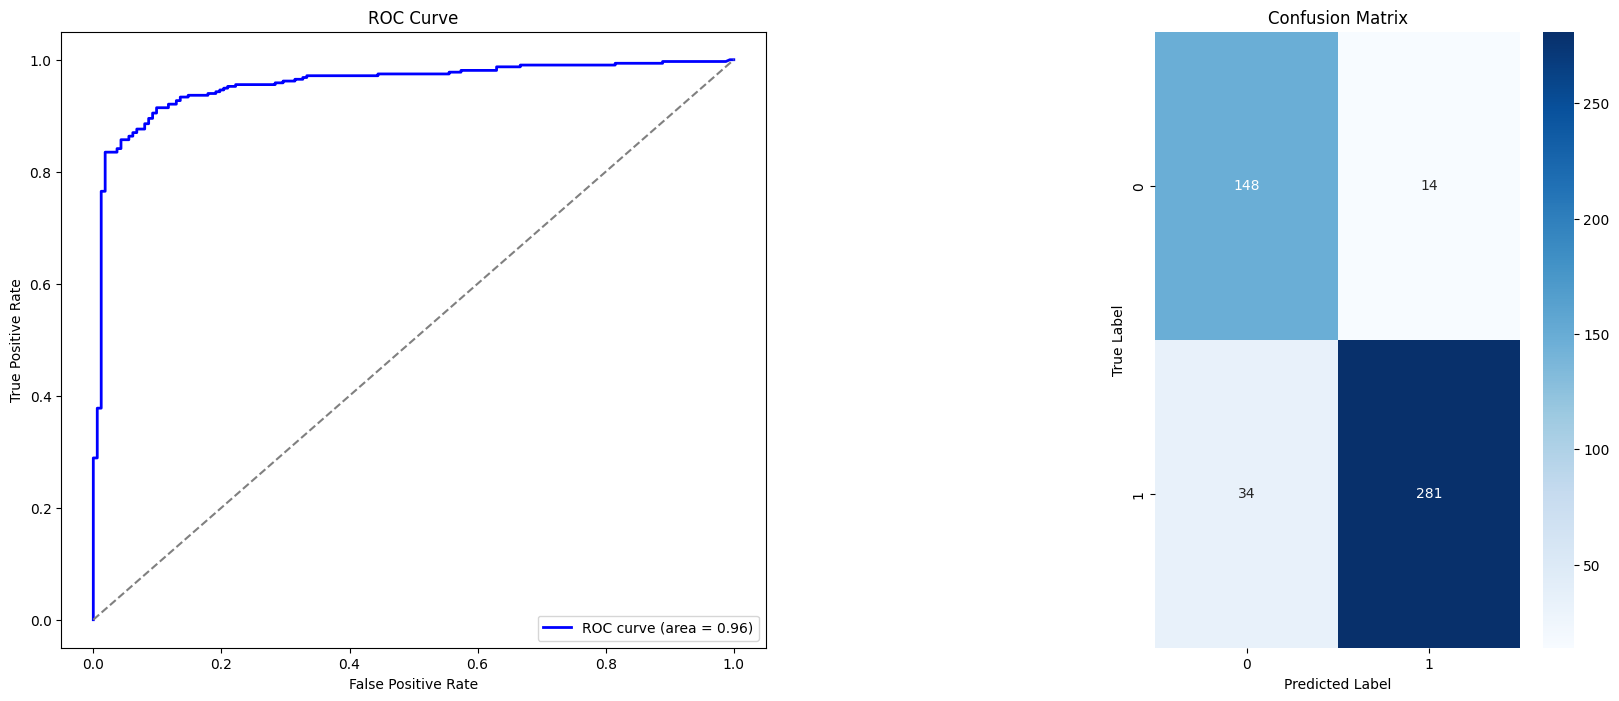

F1 Score on Test Data: 0.9213
F1 Score on Train Data: 0.9348
--------------------------------------------------
Precision Score on Test Data: 0.9525
Precision Score on Train Data: 0.9687
--------------------------------------------------
Recall Score on Test Data: 0.8921
Recall Score on Train Data: 0.9032
--------------------------------------------------
Training Score: 0.9138655462184874
Test Score: 0.89937106918239
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       162
           1       0.95      0.89      0.92       315

    accuracy                           0.90       477
   macro avg       0.88      0.90      0.89       477
weighted avg       0.91      0.90      0.90       477

--------------------------------------------------
Confusion Matrix: [[148  14]
 [ 34 281]]
--------------------------------------------------
ROC AUC Score: 0.9565451695081324


In [124]:
train_score, test_score, report, conf_matrix, roc_auc_score_value = evaluate_model(X_train, y_train, X_test, y_test, rfc_best_params)


#### Building a model with Bagging Classifier

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV


In [126]:
BCM = BaggingClassifier(base_estimator=  DecisionTreeClassifier(max_depth=7,
                                            min_samples_split=10,
                                            min_samples_leaf=4,
                                            class_weight="balanced"),
                                            n_estimators=200,
                                            max_samples=0.7,
                                            max_features=1.0,
                                            bootstrap=True,
                                            bootstrap_features=True,
                                            oob_score=True,
                                            warm_start=False,
                                            n_jobs=None,
                                            random_state=None,
                                            verbose=0,)

In [ ]:
param_grid = {
    'base_estimator__max_depth': [5, 7, 10],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 5, 10],
    'n_estimators': [100, 200, 300],
    'max_samples': [0.6, 0.7, 0.8],
    'max_features': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=BCM, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

In [135]:
BCM_best_params = BaggingClassifier(base_estimator=  DecisionTreeClassifier(max_depth=5,
                                            min_samples_split=10,
                                            min_samples_leaf=10,
                                            class_weight="balanced"),
                                            n_estimators=150,
                                            max_samples=0.6,
                                            max_features=1.0,
                                            bootstrap=True,
                                            bootstrap_features=True,
                                            oob_score=True,
                                            warm_start=False,
                                            n_jobs=None,
                                            random_state=None,
                                            verbose=0,)

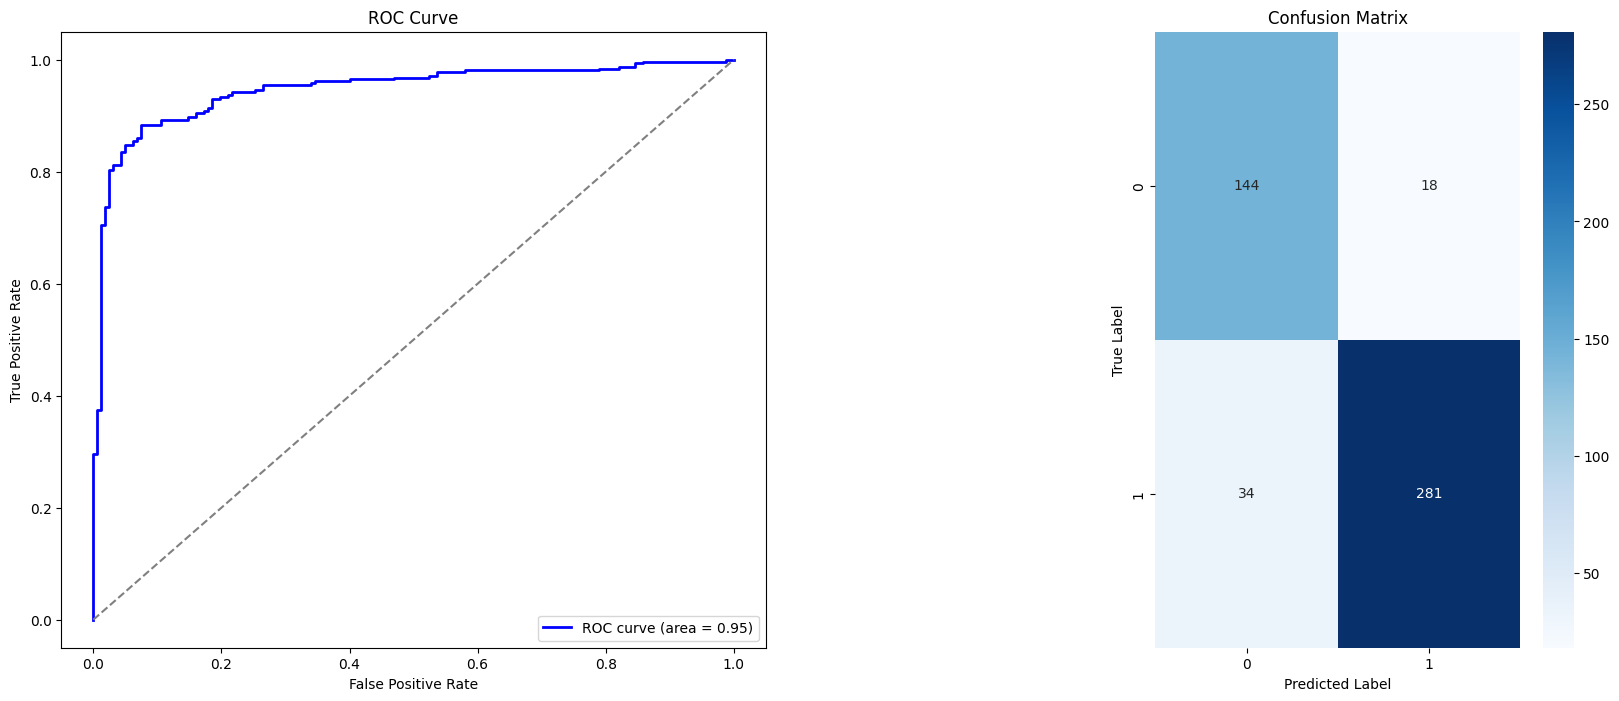

F1 Score on Test Data: 0.9153
F1 Score on Train Data: 0.9198
--------------------------------------------------
Precision Score on Test Data: 0.9398
Precision Score on Train Data: 0.9561
--------------------------------------------------
Recall Score on Test Data: 0.8921
Recall Score on Train Data: 0.8862
--------------------------------------------------
Training Score: 0.8944327731092437
Test Score: 0.8909853249475891
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       162
           1       0.94      0.89      0.92       315

    accuracy                           0.89       477
   macro avg       0.87      0.89      0.88       477
weighted avg       0.90      0.89      0.89       477

--------------------------------------------------
Confusion Matrix: [[144  18]
 [ 34 281]]
--------------------------------------------------
ROC AUC Score: 0.947070350774054

In [136]:
train_score, test_score, report, conf_matrix, roc_auc_score_value = evaluate_model(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, model=BCM_best_params)

#### Creating a model with XGBoost Classifier

In [137]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [138]:
from xgboost import XGBClassifier


In [139]:
xgb = XGBClassifier(n_estimators=100, max_depth = 2)

In [ ]:
# Defining the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(),
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
    ),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_:.4f}")

AttributeError: 'XGBClassifier' object has no attribute 'XGBClassifier'

In [140]:
xgb_best_params = XGBClassifier(n_estimators=90, max_depth = 6,
                                learning_rate=0.01,
                                subsample=0.6,
                                max_leaves=0,
                                gamma=0.2,
                                colsample_bytree=1.0,
                                verbose=0)



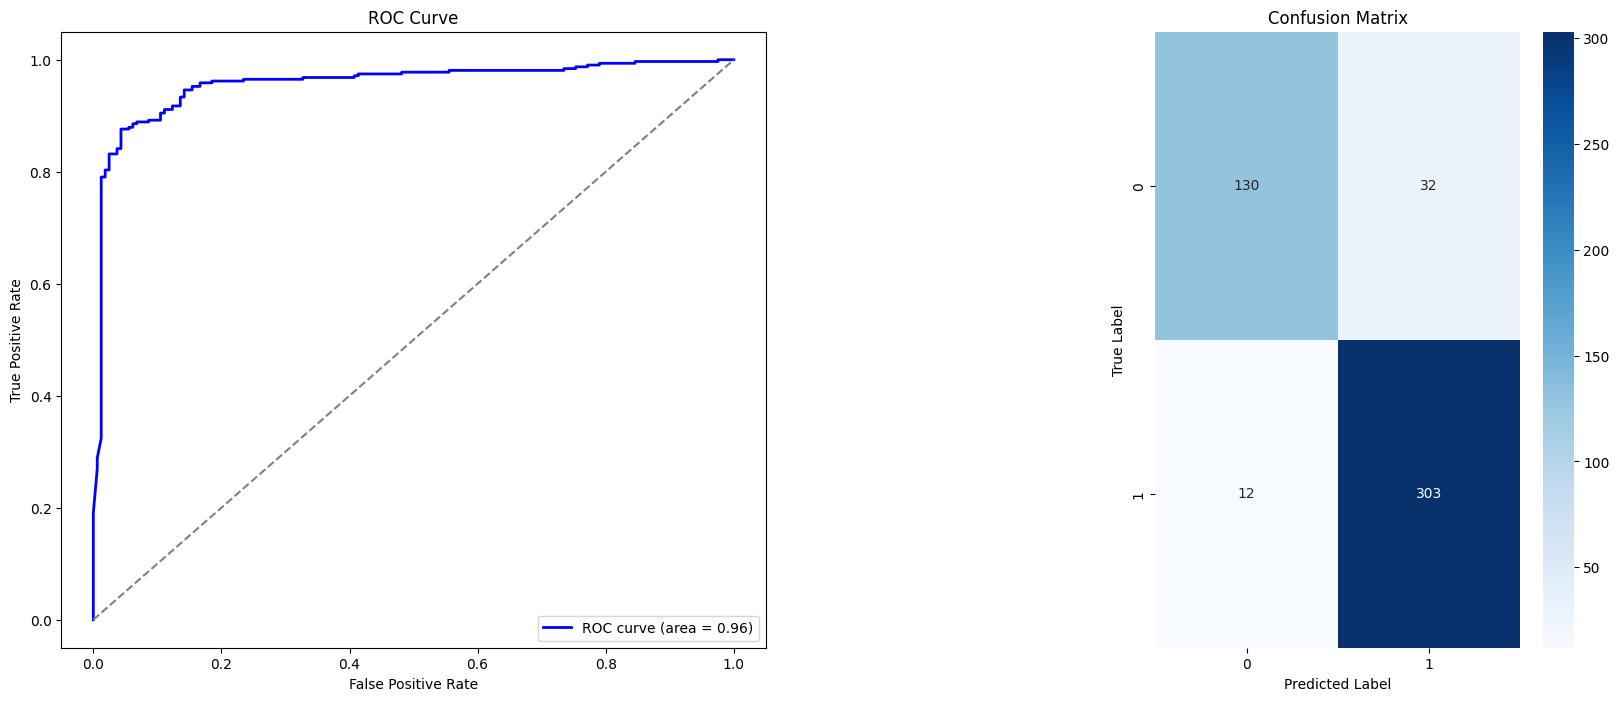

F1 Score on Test Data: 0.9323
F1 Score on Train Data: 0.9410
--------------------------------------------------
Precision Score on Test Data: 0.9045
Precision Score on Train Data: 0.9150
--------------------------------------------------
Recall Score on Test Data: 0.9619
Recall Score on Train Data: 0.9685
--------------------------------------------------
Training Score: 0.917016806722689
Test Score: 0.9077568134171907
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       162
           1       0.90      0.96      0.93       315

    accuracy                           0.91       477
   macro avg       0.91      0.88      0.89       477
weighted avg       0.91      0.91      0.91       477

--------------------------------------------------
Confusion Matrix: [[130  32]
 [ 12 303]]
--------------------------------------------------
ROC AUC Score: 0.9571428571428572

In [141]:
train_score, test_score, report, conf_matrix, roc_auc_score_value = evaluate_model(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, model=xgb_best_params)

## Questionnaire

#### 1. What percentage of drivers have received a quarterly rating of 5?

In [142]:
rating_5_percentage = (df_test['Quarterly Rating'] == 5).mean() * 100
print(f"Percentage of drivers with a quarterly rating of 5: {rating_5_percentage:.0f}%")

Percentage of drivers with a quarterly rating of 5: 0%


#### 2. Comment on the correlation between Age and Quarterly Rating.
Comment - very weak positive correlation of ___0.03___, driver's age has no influence in his/her quarterly rating's, since age doesn't seem to impact the quarterly rating, other factors—such as driving experience, number of rides, customer feedback, or city of operation—might be more significant in determining a driver's quarterly rating.

In [143]:
correlation_age_rating = df_test['Age'].corr(df_test['Quarterly Rating'])
print(f"Correlation between Age and Quarterly Rating: {correlation_age_rating:.2f}")

Correlation between Age and Quarterly Rating: 0.03


#### 3. Name the city which showed the most improvement in Quarterly Rating over the past year

In [144]:
df['Rating Change'] = df.groupby('City')['Quarterly Rating'].diff().fillna(0)
city_with_most_improvement = df.groupby('City')['Rating Change'].mean().idxmax()
print(f"City with the most improvement in Quarterly Rating: {city_with_most_improvement}")

City with the most improvement in Quarterly Rating: C23


#### 4. Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value. (T/F)

In [145]:
average_business_value_grade_A = df[df['Grade'] == 'A']['Total Business Value'].mean()
average_business_value_others = df[df['Grade'] != 'A']['Total Business Value'].mean()
print(f"Drivers with Grade A have a higher Total Business Value: {average_business_value_grade_A > average_business_value_others}")



Drivers with Grade A have a higher Total Business Value: False


#### 5. If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?

In [146]:
df['Rating Drop'] = df.groupby('Driver_ID')['Quarterly Rating'].diff().fillna(0) < -1  # Significant drop
impact_on_value = df[df['Rating Drop']].groupby('Driver_ID')['Total Business Value'].diff().mean()
print(f"Impact on Total Business Value after a significant Quarterly Rating drop: {impact_on_value}")

Impact on Total Business Value after a significant Quarterly Rating drop: 96156.875


#### 6. From Ola's perspective, which metric should be the primary focus for driver retention?
Ans - Precision - It should correctly predict the if the employee is about to leave the company so that it can focus on retaining them. This reduces the risk of misallocating resources to retain drivers who were unlikely to leave.

#### 7. How does the gap in precision and recall affect Ola's relationship with its drivers and customers?

#### **High Precision, Low Recall:**

__Impact on Drivers:__ If Ola focuses too much on precision, it might only identify a small, specific group of drivers who are highly likely to churn, missing out on many others who might also be at risk. This could result in retention efforts that seem selective or unfair, leading to dissatisfaction among drivers who feel neglected.

__Impact on Customers:__ Fewer drivers retained could mean a reduced driver pool, leading to longer wait times and reduced service quality, negatively affecting customer satisfaction.



#### ***High Recall, Low Precision: ***

__Impact on Drivers:__ A focus on high recall might lead Ola to flag a large number of drivers as potential churn risks, including many who are not actually at risk. This could lead to unnecessary interventions, such as offering incentives to drivers who do not need them, which could be seen as wasteful or even annoying to those drivers.

__Impact on Customers:__ While more drivers might be retained, the cost of unnecessary retention efforts could strain resources, potentially leading to higher costs or lower investment in other areas like customer service, ultimately impacting the customer experience.



#### 8. Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?

In [147]:
# Correlation analysis to discover less obvious features
numeric_df = df_test.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
strong_correlations = corr_matrix['Quarterly Rating'].sort_values(ascending=False).iloc[1:6]
print("Lesser-discussed features with strong impact on Quarterly Rating:")
print(strong_correlations)


Lesser-discussed features with strong impact on Quarterly Rating:
QR_Performance          1.000000
Avg_Quarterly_Rating    0.357810
Total_Income            0.296973
Total_Business_Value    0.211293
Avg_Income              0.122431
Name: Quarterly Rating, dtype: float64


#### 9. Will the driver's performance be affected by the City they operate in? (Yes/No)

In [148]:
performance_by_city = df.groupby('City')['Quarterly Rating'].mean().std() > 0
print(f"Driver's performance affected by the city they operate in: {'Yes' if performance_by_city else 'No'}")

Driver's performance affected by the city they operate in: Yes


#### 10. Analyze any seasonality in the driver's ratings. Do certain times of the year correspond to higher or lower ratings, and why might that be?


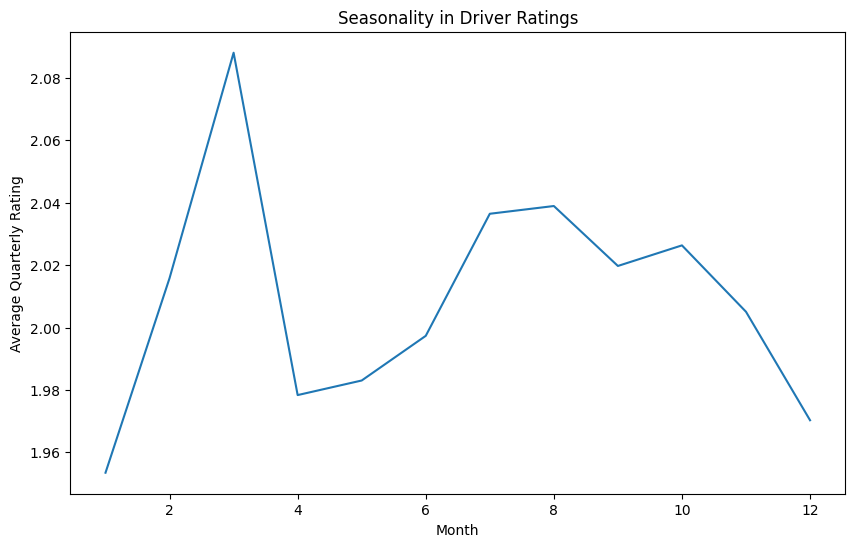

In [149]:
df['Month'] = pd.to_datetime(df['MMM-YY']).dt.month
seasonality = df.groupby('Month')['Quarterly Rating'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=seasonality.index, y=seasonality.values)
plt.title('Seasonality in Driver Ratings')
plt.xlabel('Month')
plt.ylabel('Average Quarterly Rating')
plt.show()

# Analysis: Certain months might show higher/lower ratings. This could be due to factors like holidays, weather conditions, etc.

#### Key Findings from Churn Analysis
1. Gender Distribution: The dataset consists of 1,380 male drivers and 956 female drivers.

2. Impact of Education Level: Higher Churn Probability: Drivers with education levels of 0 and 1 are more likely to churn compared to those with an education level of 2.
Joining Destination:

3. Desgination 1: The probability of churn is notably higher for drivers who joined destination 1, suggesting that this destination may have specific challenges or conditions contributing to higher churn rates.

4. Quarterly Rating: Significantly Higher Churn: Drivers with a quarterly rating of 1 exhibit a significantly higher probability of churn.

5. Increasing Ratings: Even in cases where a driver's quarterly rating has increased over their tenure, a similar pattern of elevated churn probability is observed.
Tenure and Year of Joining:

6. Drivers Who Joined in 2018 and 2019: There is a noticeable spike in churn probability among drivers who joined in 2018 and 2019, compared to those who joined in 2020 or before 2018. This could indicate specific external factors or conditions affecting driver retention during those years.


####  Other Key Insights

1. ***Gender Distribution:*** The workforce consists of 57% male and 43% female employees.

2. ***Education Levels:*** The distribution of employees across education levels 1 and 2 is nearly identical.

3. ***Raises and Promotions:*** A staggering 97.3% of employees have not received a raise. While 54.6% of employees have been promoted, only 2.6% have seen an increase in their income.

4. ***Joining Designation:*** Nearly 43% of employees joined at the lowest designation level (1), followed by 34% at level 2, 20% at level 3, and fewer than 2% at higher levels.

5.  ***Yearly Trends:*** The number of employees has steadily increased over the years, correlating with a rise in the number of reportings.

6. ***City Distribution:*** A significant portion of the workforce is based in city C20.

7. ***Income and Age Correlation:*** A scatter plot of income reveals that income generally increases with age, but there is a subtle decline after the age of 45-50.

8. ***Total Business Value and Age Correlation:*** Similarly, Total Business Value shows an upward trend with age, with a noticeable decline after age 45.

9. ***Income and Designation:*** Income decreases as designation increases, with approximately 4% of employees holding higher designations.

10. ***Income and Grades:*** The median income is higher for employees with superior grades.

11. ***Income and Education Levels:*** The distribution of income across different education levels shows a variation of 3-5%, with level 0 as the reference.

12. ***Grade and Joining Designation:*** Employees with higher grades tend to have joined at higher designations.

13. ***Reporting Trends:***The top reporting frequency is 24 days.
Approximately 55% of employee reportings have a Quarterly Rating of 1. The number of reportings increases with both income and
Total Business Value.


